In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [4]:
dfcopy=df.copy()

In [5]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
    PolynomialFeatures,
    FunctionTransformer
)

In [7]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [8]:
dfcopy.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [9]:
dfcopy.nunique()

ID                       4809
country                   105
age_group                   4
travel_with                 5
total_female               14
total_male                 14
purpose                     7
main_activity               9
info_source                 8
tour_arrangement            2
package_transport_int       2
package_accomodation        2
package_food                2
package_transport_tz        2
package_sightseeing         2
package_guided_tour         2
package_insurance           2
night_mainland             64
night_zanzibar             34
payment_mode                4
first_trip_tz               2
most_impressing             7
total_cost               1637
dtype: int64

In [10]:
dfcopy["first_trip_tz"].nunique()

2

In [11]:
dfcopy["first_trip_tz"].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
dfcopy["night_zanzibar"].unique()

array([ 0.,  7., 31.,  4.,  3.,  2., 11.,  6.,  5., 10.,  1., 30., 13.,
        9., 15., 21., 14., 12., 25., 35., 60., 16., 19., 24., 27., 17.,
       22., 43., 33., 23., 26., 50., 61., 20.])

In [13]:
dfcopy.package_food.unique()

array(['No', 'Yes'], dtype=object)

In [14]:
dfcopy["purpose"].unique

<bound method Series.unique of 0                 Leisure and Holidays
1                 Leisure and Holidays
2       Visiting Friends and Relatives
3                 Leisure and Holidays
4                 Leisure and Holidays
                     ...              
4804                          Business
4805              Leisure and Holidays
4806              Leisure and Holidays
4807                          Business
4808              Leisure and Holidays
Name: purpose, Length: 4809, dtype: object>

In [15]:
dfcopy["purpose"].unique()

array(['Leisure and Holidays', 'Visiting Friends and Relatives',
       'Business', 'Meetings and Conference', 'Volunteering',
       'Scientific and Academic', 'Other'], dtype=object)

In [16]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

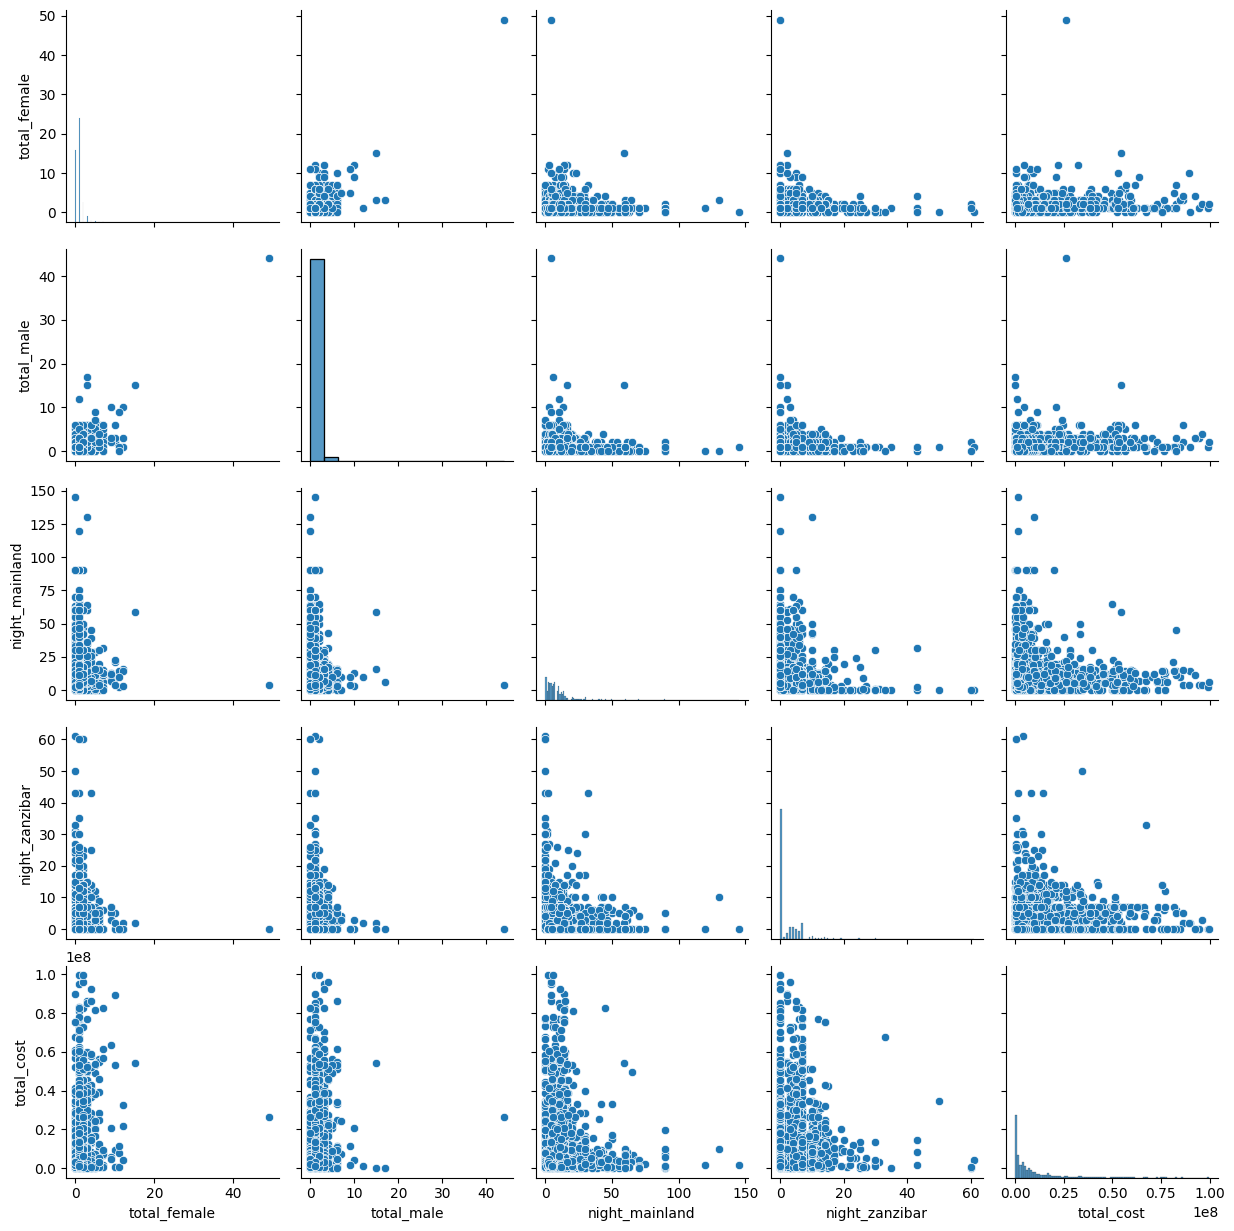

In [17]:
sns.pairplot(dfcopy)

In [18]:
dfcopy.drop("ID",axis=1,inplace=True)

In [19]:
X = df.drop("total_cost",axis=1)
y = df["total_cost"]

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [21]:
X_train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
3552,tour_5304,SUDAN,25-44,Spouse and Children,2.0,2.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0.0,4.0,Credit Card,Yes,Friendly People
2243,tour_3730,UNITED STATES OF AMERICA,65+,Spouse,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,No,No,No,14.0,0.0,Cash,Yes,Wildlife
630,tour_1776,UNITED STATES OF AMERICA,1-24,NaN,0.0,1.0,Leisure and Holidays,Conference tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,No,14.0,0.0,Credit Card,Yes,No comments
4228,tour_6122,ZIMBABWE,25-44,Alone,0.0,1.0,Business,Wildlife tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,1.0,0.0,Cash,No,No comments
404,tour_1493,UNITED STATES OF AMERICA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,No,14.0,0.0,Cash,Yes,Friendly People


In [22]:
cat_fea=["country","age_group","travel_with","purpose","main_activity",
         "info_source","tour_arrangement","package_transport_int","package_accomodation",
         "package_food","package_transport_tz","package_sightseeing","package_guided_tour",
         "package_insurance","payment_mode","first_trip_tz","most_impressing"]

In [23]:
num_fea=["total_female","total_male","night_mainland","night_zanzibar"]

In [24]:
num_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
      PolynomialFeatures(degree=2,interaction_only=True))

In [25]:
# column transformation
cat_transformer = make_pipeline(
        SimpleImputer(strategy='most_frequent'),
        OneHotEncoder(handle_unknown='ignore')
    )

In [26]:
preprocessor = make_column_transformer(
    (num_transformer, num_fea),
    (cat_transformer, cat_fea)
    )

In [27]:
X_train_fe = preprocessor.fit_transform(X_train)
X_test_fe = preprocessor.transform(X_test)


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
LR=LinearRegression()

In [30]:
LR.fit(X_train_fe,y_train)

LinearRegression()

In [31]:
training_score = LR.score(X_train_fe,y_train)
print(f"training r2 score: {round(training_score, 6)}")

training r2 score: 0.402238


In [32]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train_fe,y_train)

RandomForestRegressor()

In [33]:
training_score = RF.score(X_train_fe,y_train)
print(f"training r2 score: {round(training_score, 6)}")

training r2 score: 0.906467


In [34]:
test_score = RF.score(X_test_fe,y_test)
print(f"test r2 score: {round(test_score, 6)}")

test r2 score: 0.333348


In [35]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(max_depth=7,n_estimators=500,max_features='sqrt', random_state=42,bootstrap=True,)
RF.fit(X_train_fe,y_train)

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [36]:
training_score = RF.score(X_train_fe,y_train)
print(f"training r2 score: {round(training_score, 6)}")

training r2 score: 0.506045


In [37]:
test_score = RF.score(X_test_fe,y_test)
print(f"test r2 score: {round(test_score, 6)}")

test r2 score: 0.381472


In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [85, 80],
    'max_depth': [23,20,17],
    'min_samples_split': [1,2],
    'min_samples_leaf': [2,3],
    'max_features': ['sqrt']
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_fe, y_train)
grid_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 80}

In [39]:
training_score = grid_search.score(X_train_fe,y_train)
print(f"training r2 score: {round(training_score, 6)}")

training r2 score: 0.689566


In [40]:
test_score = grid_search.score(X_test_fe,y_test)
print(f"test r2 score: {round(test_score, 6)}")

test r2 score: 0.41259


In [41]:
final=pd.DataFrame(X_train_fe)

In [42]:
final.head()

,0
0,<Compressed Sparse Row sparse matrix of dtype ...
1,<Compressed Sparse Row sparse matrix of dtype ...
2,<Compressed Sparse Row sparse matrix of dtype ...
3,<Compressed Sparse Row sparse matrix of dtype ...
4,<Compressed Sparse Row sparse matrix of dtype ...


In [43]:
testing=grid_search.predict(X_test_fe)

dftest=pd.read_csv("Test.csv")
test_feautreeng=preprocessor.transform(dftest)
predictiontest=grid_search.predict(test_feautreeng)

In [44]:
dfsubmit=pd.read_csv("SampleSubmission.csv",index_col="ID")
dfsubmit.head()
dfsubmit["total_cost"]=predictiontest
dfsubmit.to_csv("SampleSubmission.csv")


In [45]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.02, random_state=42,max_iter=10000)

In [46]:
lasso.fit(X_train_fe,y_train)

Lasso(alpha=0.02, max_iter=10000, random_state=42)

In [47]:
training_score = lasso.score(X_train_fe,y_train)
print(f"training r2 score: {round(training_score, 6)}")

training r2 score: 0.402238


In [48]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, random_state=42,max_iter=10000)
lasso.fit(X_train_fe,y_train)
training_score = lasso.score(X_train_fe,y_train)
print(f"training r2 score: {round(training_score, 6)}")

training r2 score: 0.402238


In [49]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=20, random_state=42,max_iter=10000)
lasso.fit(X_train_fe,y_train)
training_score = lasso.score(X_train_fe,y_train)
print(f"training r2 score: {round(training_score, 6)}")

training r2 score: 0.402238


In [93]:
final2=pd.DataFrame(X_train_fe.todense())
final2.head()

,0,1,2,3,4,5,6,7,8,9,...,163,164,165,166,167,168,169,170,171,172
0,1.0,0.058428,-0.005941,0.163607,0.393738,-0.000347,0.009559,0.023005,-0.000972,-0.002339,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.058428,-0.884342,0.365109,-0.532973,-0.051670,0.021333,-0.031141,-0.322882,0.471331,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,-0.698186,0.872459,-0.239399,-0.532973,-0.609139,0.167145,0.372115,-0.208866,-0.464998,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,-0.698186,-0.005941,0.566612,-0.532973,0.004148,-0.395601,0.372115,-0.003366,0.003167,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.058428,-0.005941,-0.340151,-0.532973,-0.000347,-0.019874,-0.031141,0.002021,0.003167,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [50]:
from sklearn.linear_model import Ridge
re = Ridge(alpha=2, random_state=42,max_iter=100000)
re.fit(X_train_fe,y_train)
training_score = re.score(X_train_fe,y_train)
print(f"training r2 score: {round(training_score, 6)}")

training r2 score: 0.401048


In [51]:
from xgboost import  XGBRegressor
xg=XGBRegressor()
xg.fit(X_train_fe,y_train)
training_score = xg.score(X_train_fe,y_train)
print(f"training r2 score: {round(training_score, 6)}")

training r2 score: 0.881724


In [52]:
test_score = xg.score(X_test_fe,y_test)
print(f"test r2 score: {round(test_score, 6)}")

test r2 score: 0.298759


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.3, 0.7]
}

grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train_fe, y_train)

best_model = grid_search.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [156]:
test_score = best_model.score(X_test_fe,y_test)
print(f"test r2 score: {round(test_score, 6)}")

test r2 score: 0.290702
